In [1]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
url <- "https://raw.githubusercontent.com/sweetmidnights/T1-008-DataScienceProject-32/main/student-mat.csv"
dataset_2 <- read_delim(url, delim = ";")
dataset_2

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


absences,Fedu,Medu,G1,G2,G3,GT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,4,5,6,6,28.33333
4,1,1,5,5,6,26.66667
10,1,1,7,8,10,41.66667
2,2,4,15,14,15,73.33333
4,3,3,6,10,10,43.33333
10,3,4,15,15,15,75.00000
0,2,2,12,12,11,58.33333
6,4,4,6,5,6,28.33333
0,2,3,16,18,19,88.33333


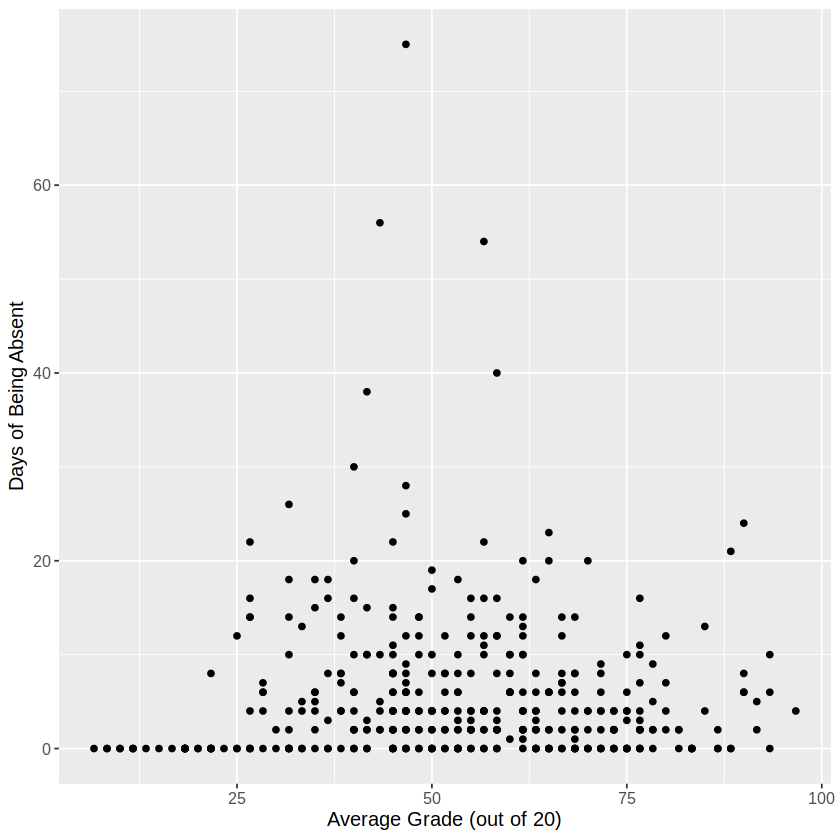

In [9]:
question_1 <- dataset_2 |>
              select(absences, Fedu, Medu, G1, G2, G3) |>
              mutate(GT = ((G1 + G2 + G3) / 3)* 5)
question_1

plot_question_1 <- ggplot(question_1 , aes(x = GT, y = absences)) +
                   geom_point() +
                   xlab("Average Grade (out of 20)") +
                   ylab("Days of Being Absent") +
                   theme(text = element_text(size = 12))

plot_question_1



                   